<a href="https://colab.research.google.com/github/Vasanth12414/Deep-Learning-Models/blob/main/RNN(GOOGLE_STOCK_PRICES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout

In [3]:
df = pd.read_csv('/content/Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train_set = df.iloc[:,4:5].values
train_set

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [7]:
len(train_set)

1258

In [8]:
x_train = train_set[0:1257]
y_train = train_set[1:1258]

In [9]:
x_train.shape

(1257, 1)

In [10]:
import numpy as np

In [11]:
x_train = np.reshape(x_train , (1257,1,1))
x_train

array([[[663.59]],

       [[666.45]],

       [[657.21]],

       ...,

       [[791.55]],

       [[785.05]],

       [[782.79]]])

In [12]:
model = Sequential(
    [
        LSTM(units=50,return_sequences=True,input_shape=(None,1)),
        Dropout(0.25),
        Dense(1,activation='sigmoid')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
model.fit(x_train ,y_train , batch_size = 10 , epochs = 100 )

Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 529325.8125
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 532986.0625
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 528716.3750
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 540811.1250
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 540480.8125
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 530044.5625
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 540647.5625
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 537537.5000
Epoch 9/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 530243.6250
Epoch 10/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 525302.7500
Epoch 11/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 529691.5625
Epoch 12/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 537904.1875
Epoch 13/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 528702.8125
Epoch 14/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

In [19]:
test_set = pd.read_csv('/content/Google_Stock_Price_Train.csv')
# Clean the 'Close' column in the test_set:
test_set['Close'] = test_set['Close'].str.replace(',', '').astype(float) # Replace commas and convert to float
test_set = test_set.iloc[:,4:5].values
inputs = sc.transform(test_set)
inputs

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [21]:
inputs = np.reshape(inputs , (inputs.shape[0],1,1)) # Reshape to (1258, 1, 1)

In [22]:
inputs

array([[[0.23757287]],

       [[0.24151427]],

       [[0.22878051]],

       ...,

       [[0.40495845]],

       [[0.40184391]],

       [[0.38672602]]])

In [23]:
predicted_values = model.predict(inputs)
predicted_values

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[[0.78316414]],

       [[0.78331405]],

       [[0.78282946]],

       ...,

       [[0.78954154]],

       [[0.78942275]],

       [[0.7888464 ]]], dtype=float32)

In [24]:
predicted_values.shape

(1258, 1, 1)

In [26]:
predicted_values = np.reshape(predicted_values, (predicted_values.shape[0], 1))
# Reshape to (1258, 1) - keeping all predicted values
predicted_values

array([[0.78316414],
       [0.78331405],
       [0.78282946],
       ...,
       [0.78954154],
       [0.78942275],
       [0.7888464 ]], dtype=float32)

In [27]:
test_pred = sc.inverse_transform(predicted_values)
test_pred

array([[1059.4874],
       [1059.5962],
       [1059.2446],
       ...,
       [1064.1151],
       [1064.0288],
       [1063.6106]], dtype=float32)

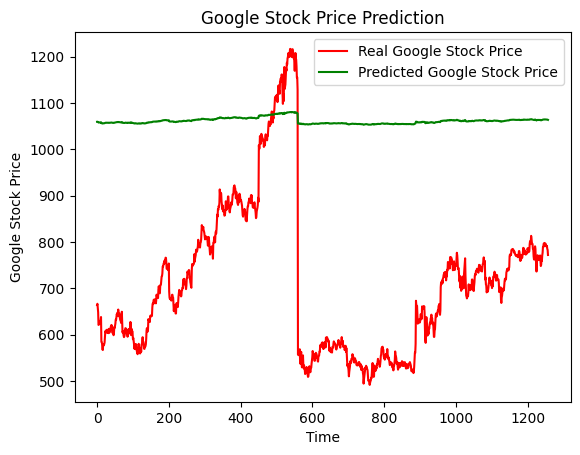

In [28]:
import matplotlib.pyplot as plt
plt.plot(test_set,color='red',label='Real Google Stock Price')
plt.plot(test_pred,color='green',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.legend()
plt.ylabel('Google Stock Price')
plt.show()

In [37]:
today_price = float(input('Enter today price'))


Enter today price1161


In [38]:
arr = np.array(today_price).reshape(-1,1)


In [39]:
arr1 = sc.transform(arr)

In [40]:
arr1 = arr1.reshape(-1,1,1)

In [41]:
result = model.predict(arr1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [42]:
result = np.reshape(result, (1,1))

In [43]:
tomorrow_price = sc.inverse_transform(result)

In [44]:
print("Predicted price tomorrow= %.2f" % tomorrow_price)

Predicted price tomorrow= 1078.41


<ipython-input-44-c417efb25f34>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price tomorrow= %.2f" % tomorrow_price)
